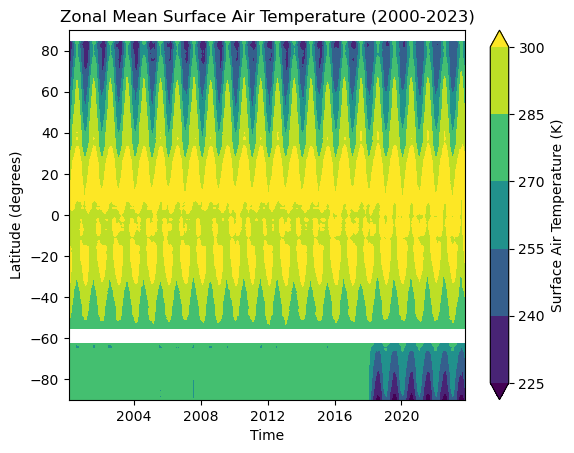

In [5]:
# located: /glade/work/sglanvil/CCR/SMYLE/plot_TSA_SMYLE_LAND.ipynb
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

start_date = '2000-01-01'
end_date = '2023-10-31'
date_frequency = 'M'
dateArray = pd.date_range(start=start_date, end=end_date, freq=date_frequency)

file = "/glade/derecho/scratch/sglanvil/holdingCell/SMYLE_LAND/smyle_Transient.clm2.h0.200001-202310.nc"
ds = xr.open_dataset(file)
var = ds['TSKIN']
lon = ds['lon']
lat = ds['lat']
time = ds['time']

varZM = var.mean(dim='lon', skipna=True)

plt.contourf(dateArray, lat, varZM.T, extend='both')
plt.colorbar(label='Surface Air Temperature (K)')
plt.ylabel('Latitude (degrees)')
plt.xlabel('Time')
plt.title('Zonal Mean Surface Air Temperature (2000-2023)')
plt.savefig("/glade/work/sglanvil/CCR/SMYLE/TSKIN_SMYLE_LAND_26apr2024.png", dpi=300)
plt.show()


In [28]:
# April 29, 2024
# original crujra location: /glade/campaign/cgd/tss/people/dll/TRENDY2020_Forcing/three_stream_files/domain.crujra.0.5x0.5.c200728.nc

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
import datetime

old_file = "/glade/derecho/scratch/wwieder/domain.crujra.0.5x0.5.c200728.nc"
new_file = "/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/land_forcing/three_stream/domain.JRA55.0.56x0.56.c210708.nc"

ds = xr.open_dataset(old_file)
old_lon = ds.xc[1,:] # old longitude
old_lat = ds.yc[:,1] # old latitude
old_mask = ds.mask

ds = xr.open_dataset(new_file)
new_lon = ds.xc[1,:] # new longitude
new_lat = ds.yc[:,1] # new latitude
new_mask = ds.mask
xc = ds.xc
yc = ds.yc
xv = ds.xv
yv = ds.yv
area = ds.area

interpolator = RectBivariateSpline(old_lat, old_lon, old_mask)
mask = interpolator(new_lat,new_lon)
mask[mask < 0.5] = 0
mask[mask >= 0.5] = 1

# ------------- save to new netcdf file -------------
ds = xr.Dataset()
ds['xc'] = xr.DataArray(xc)
ds['yc'] = xr.DataArray(yc)
ds['xv'] = xr.DataArray(xv)
ds['yv'] = xr.DataArray(yv)
ds['mask'] = xr.DataArray(mask, dims=('nj', 'ni'))
ds['mask'].attrs = new_mask.attrs
ds['area'] = xr.DataArray(area)
ds.attrs['creation_date'] = str(datetime.datetime.now())
ds.attrs['author'] = 'Sasha Glanville (sglanvil@ucar.edu)'
ds.attrs['source_file'] = '/glade/campaign/cesm/development/espwg/SMYLE/initial_conditions/land_forcing/three_stream/domain.JRA55.0.56x0.56.c210708.nc'
ds.attrs['notes'] = 'interpolated JRA55 mask onto crujra mask (in order to leave out Antarctica,etc.)'
ds.to_netcdf("/glade/u/home/sglanvil/analysis/python/analysis/domain.JRA55.0.56x0.56.c240430.nc")


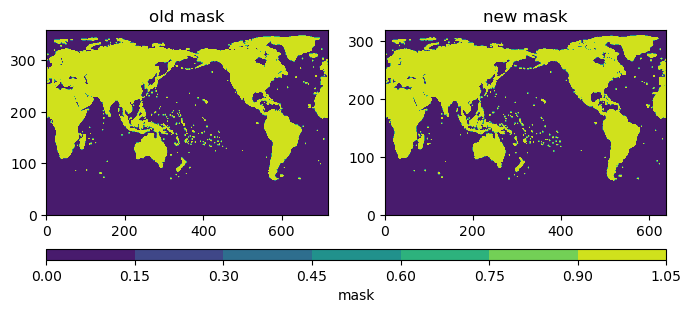

In [29]:
# ------------- plot old mask and new  mask -------------
fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 3 columns
cmap = 'viridis'  # Example colormap
im0 = axs[0].contourf(old_mask,cmap=cmap)
axs[0].set_title('old mask')

im1 = axs[1].contourf(mask,cmap=cmap)
axs[1].set_title('new mask')

cbar = fig.colorbar(im1, ax=axs, orientation='horizontal',
                    pad=0.15, fraction=0.05, aspect=60)
cbar.set_label('mask')